In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.axes import Axes
from matplotlib.gridspec import GridSpec
import typing as t

max_robots = 5
algs = {
    "namo": "NAMO + CR + RepulsiveDR",
    "namo_ndr": "NAMO + CR",
    "namo_ncr": "NAMO",
    "snamo": "S-NAMO + CR + SocialDR",
    "snamo_ndr": "S-NAMO + CR",
    "snamo_ncr": "S-NAMO",
    "snamo_distance_dr": "S-NAMO + CR + RepulsiveDR",
}

scenario = 'intersections'
#scenario = 'willow_garage_multi_shape'
data = pandas.read_csv(f"../report_intersections.csv")
data["succeeded"] = data["succeeded"].astype(int)
data_successes = data[data["succeeded"] == 1]
sum_goals_per_agent_per_sim = data.groupby(['n_robots', 'algorithm', 'sim_id', 'agent_id']).sum().reset_index()
max_goals_per_agent_per_sim = sum_goals_per_agent_per_sim.drop(columns='agent_id').groupby(['n_robots', 'algorithm', 'sim_id']).max().reset_index()[['n_robots', 'algorithm', 'n_steps']]
sum_goals_per_agent_per_sim['succeeded'] /= 50
avg_per_agent = sum_goals_per_agent_per_sim.drop(columns=["agent_id", "sim_id"]).groupby(['n_robots', 'algorithm']).mean()
med_per_agent = sum_goals_per_agent_per_sim.drop(columns=["agent_id", "sim_id"]).groupby(['n_robots', 'algorithm']).median()
std_per_agent = sum_goals_per_agent_per_sim.drop(columns=["agent_id", "sim_id"]).groupby(['n_robots', 'algorithm']).std()
count_per_agent = sum_goals_per_agent_per_sim.drop(columns=["agent_id", "sim_id"]).groupby(['n_robots', 'algorithm']).count()

avg_make_span = max_goals_per_agent_per_sim.groupby(['n_robots', 'algorithm']).mean()
count_make_span = max_goals_per_agent_per_sim.groupby(['n_robots', 'algorithm']).count()
std_make_span = max_goals_per_agent_per_sim.groupby(['n_robots', 'algorithm']).std()

data = data.drop(columns=["agent_id", "sim_id"])
success_rates = data.groupby(['n_robots','algorithm'])['succeeded'].mean().reset_index()


/tmp/ipykernel_1840067/1576939207.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas


In [2]:
avg_per_agent

succeeded  distance_traveled  n_transfers  \
n_robots algorithm                                                      
1        namo                  0.9680       36291.548512     23.30000   
         namo_ncr              0.9680       36291.548512     23.30000   
         namo_ndr              0.9680       36291.548512     23.30000   
         snamo                 0.9830       30996.840300     19.90000   
         snamo_distance_dr     0.9830       30996.840300     19.90000   
         snamo_ncr             0.9830       30996.840300     19.90000   
         snamo_ndr             0.9830       30996.840300     19.90000   
2        namo                  0.9090       35113.934174     23.55000   
         namo_ncr              0.4575       15291.111300     10.70000   
         namo_ndr              0.7520       26382.637516     19.47500   
         snamo                 0.9105       32927.992789     18.70000   
         snamo_ncr             0.4275       13075.578571      9.03125   

                            planning_time  n_planning_timeouts  postponements  \
n_robots algorithm                                                              
1        namo                   21.169501                0.000          0.000   
         namo_ncr               20.683408                0.000          0.000   
         namo_ndr               20.845560                0.000          0.000   
         snamo                  35.153217                0.000          0.000   
         snamo_distance_dr      33.790109                0.000          0.000   
         snamo_ncr              35.234764                0.000          0.000   
         snamo_ndr              35.250565                0.000          0.000   
2        namo                   48.851043                0.050        527.950   
         namo_ncr               16.777706                0.000          0.000   
         namo_ndr               51.132711                0.225        323.525   
         snamo                 106.658286                0.200        490.325   
         snamo_ncr              51.061362                0.000          0.000   

                            replans  transfer_distance_traveled  n_conflicts  \
n_robots algorithm                                                             
1        namo                50.000                 1467.767663      0.00000   
         namo_ncr            50.000                 1467.767663      0.00000   
         namo_ndr            50.000                 1467.767663      0.00000   
         snamo               50.000                 2877.642768      0.00000   
         snamo_distance_dr   50.000                 2877.642768      0.00000   
         snamo_ncr           50.000                 2877.642768      0.00000   
         snamo_ndr           50.000                 2877.642768      0.00000   
2        namo               100.950                 1578.445964   1209.57500   
         namo_ncr            50.000                  792.416948     26.27500   
         namo_ndr            72.675                 1355.812817    334.30000   
         snamo              101.100                 3104.936923    846.55000   
         snamo_ncr           50.000                 1669.858403     27.65625   

                            n_rr_conflicts     n_steps  
n_robots algorithm                                      
1        namo                      0.00000  2908.05000  
         namo_ncr                  0.00000  2908.05000  
         namo_ndr                  0.00000  2908.05000  
         snamo                     0.00000  2500.85000  
         snamo_distance_dr         0.00000  2500.85000  
         snamo_ncr                 0.00000  2500.85000  
         snamo_ndr                 0.00000  2500.85000  
2        namo                   1203.05000  4079.85000  
         namo_ncr                 25.40000  1284.57500  
         namo_ndr                329.80000  2504.07500  
         snamo                   839.92500  3777.60000  
        

In [3]:
avg_make_span

n_steps
n_robots algorithm                 
1        namo               2908.05
         namo_ncr           2908.05
         namo_ndr           2908.05
         snamo              2500.85
         snamo_distance_dr  2500.85
         snamo_ncr          2500.85
         snamo_ndr          2500.85
2        namo               4678.10
         namo_ncr           1490.20
         namo_ndr           2692.15
         snamo              4381.95
         snamo_ncr          1255.50

In [4]:
success_rates

,n_robots,algorithm,succeeded
0,1,namo,0.9680
1,1,namo_ncr,0.9680
2,1,namo_ndr,0.9680
3,1,snamo,0.9830
4,1,snamo_distance_dr,0.9830
5,1,snamo_ncr,0.9830
6,1,snamo_ndr,0.9830
7,2,namo,0.9090
8,2,namo_ncr,0.4575
9,2,namo_ndr,0.7520


In [5]:
def plot_metric_by_num_robots(
    *,
    ax: Axes,
    algs: t.Dict[str, str],
    max_robots: int,
    avg,
    std,
    ylabel: str,
    show_legend: bool = False,
    show_std: bool = False,
    show_std2: bool = False
):
    fig_legend = plt.figure("Legend")

    lines = []
    labels = []
    for alg, title in algs.items():
        means = np.array([avg.loc[(i, alg)] for i in range(1, max_robots + 1)])
        stds = np.array([std.loc[(i, alg)] for i in range(1, max_robots + 1)])
        (line,) = ax.plot(
            range(1, max_robots + 1),
            means,
            label=title,
        )
        lines.append(line)
        labels.append(title)
        if show_std:
            ax.fill_between(
                x=range(1, max_robots + 1),
                y1=means - stds,
                y2=means + stds,
                alpha=0.2,
            )
        #------ JSA
        if show_std2:
            (line_stda,) = ax.plot(
            range(1, max_robots + 1),
            means - stds,
            label=title,
            linestyle = 'dotted',
            color=line.get_color(),
            alpha=0.7,
            linewidth = 0.8,
          )
            (line_stdb,) = ax.plot(
            range(1, max_robots + 1),
            means + stds,
            label=title,
            linestyle = 'dotted',
            color=line.get_color(),
            alpha=0.7,
            linewidth = 0.8,
          )
    fig_legend.legend(lines, labels, loc='center', frameon=False)
    fig_legend.savefig(f'{scenario}_legend.png', bbox_inches='tight')
    # ax.set_ylabel(ylabel)
    ax.set_xlim([1, max_robots])

    #------ JSA
    # ax.set_ylabel(ylabel)
    ax.set_xlim([1, max_robots])
    #ax.grid(color = 'white', linestyle = '--', linewidth = 0.8,axis = 'y')
    #ax.grid(color = 'gray', linestyle = '--', linewidth = 0.8,axis = 'y')
    ax.grid(color = '#DDDFE5', linestyle = '--', linewidth = 1.0,axis = 'y')
    ax.grid(color = '#DDDFE5', linestyle = '--', linewidth = 1.0,axis = 'x')
    #ax.grid(color = '#ACADAF', linestyle = '--', linewidth = 0.8,axis = 'y')
    #ax.grid(color = '#ACADAF', linestyle = '--', linewidth = 0.8,axis = 'x')



    ax.set_facecolor("#F5F8F8")

    ax.spines['bottom'].set_color('#000')
    #ax.spines['top'].set_color('#C6C6D1')
    ax.spines['top'].set_color('white')
    #ax.spines['right'].set_color('#C6C6D1')
    ax.spines['right'].set_color('white')
    ax.spines['left'].set_color('#000')

    ax.tick_params(axis='x', colors='#000',labelsize= 15)
    ax.tick_params(axis='y', colors='#000',labelsize= 15)

    ax.yaxis.label.set_color('#000')
    ax.xaxis.label.set_color('#000')



    # ax.set_facecolor("whitesmoke")
    # ax.set_facecolor("lightgrey")
    # ax.set_facecolor("aliceblue")

KeyError: (3, 'namo')

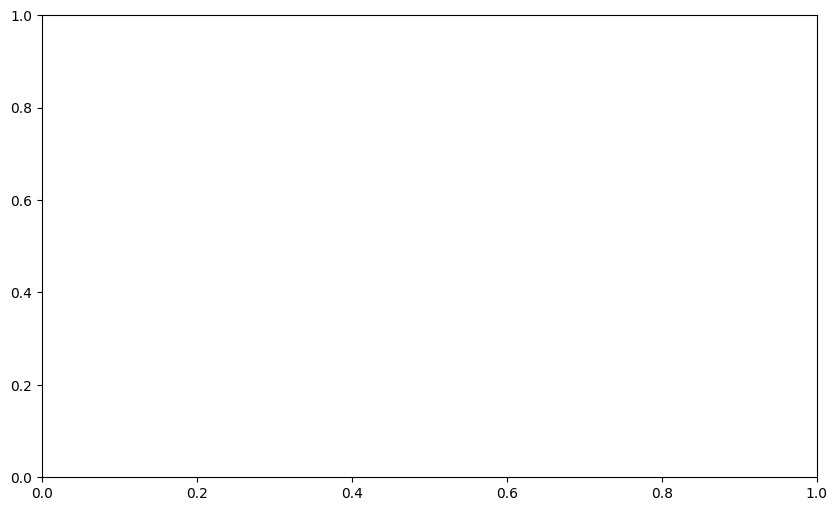

<Figure size 640x480 with 0 Axes>

In [6]:
fig = plt.figure(constrained_layout=False, figsize=(10,6))
gs = GridSpec(1, 1, figure=fig)

plot_metric_by_num_robots(
    ax=fig.add_subplot(gs[0, 0]),
    avg=avg_per_agent['succeeded'],
    std=std_per_agent['succeeded'] / 2,
    max_robots=max_robots,
    algs=algs,
    ylabel="Goal Success Rate",
    show_std=True,
    show_std2=False,
)
fig.savefig(f'{scenario}_success_rates.png', bbox_inches='tight')

In [ ]:
fig = plt.figure(constrained_layout=False, figsize=(10,6))
gs = GridSpec(1, 1, figure=fig)

plot_metric_by_num_robots(
    ax=fig.add_subplot(gs[0, 0]),
    avg=avg_per_agent['distance_traveled'],
    std=std_per_agent['distance_traveled'] / 2,
    max_robots=max_robots,
    algs=algs,
    ylabel="Distance",
    show_std=True,
    show_std2=True,
)
fig.savefig(f'{scenario}_distance.png', bbox_inches='tight')

In [ ]:
fig = plt.figure(constrained_layout=False, figsize=(10,6))
gs = GridSpec(1, 1, figure=fig)
plot_metric_by_num_robots(
    ax=fig.add_subplot(gs[0, 0]),
    avg=avg_per_agent['n_transfers'],
    std=std_per_agent['n_transfers'] / 2,
    max_robots=max_robots,
    algs=algs,
    ylabel="Num Transfers",
    show_std=True,
    show_std2=True,
)
fig.savefig(f'{scenario}_transfers.png', bbox_inches='tight')

In [ ]:
fig = plt.figure(constrained_layout=False, figsize=(10,6))
gs = GridSpec(1, 1, figure=fig)
plot_metric_by_num_robots(
    ax=fig.add_subplot(gs[0, 0]),
    avg=avg_per_agent['replans'],
    std=std_per_agent['replans'] / 2,
    max_robots=max_robots,
    algs=algs,
    ylabel="Num Replans",
    show_std=True,
    show_std2=True,
)
fig.savefig(f'{scenario}_replans.png', bbox_inches='tight')

In [ ]:
fig = plt.figure(constrained_layout=False, figsize=(10,6))
gs = GridSpec(1, 1, figure=fig)
plot_metric_by_num_robots(
    ax=fig.add_subplot(gs[0, 0]),
    avg=avg_per_agent['planning_time'],
    std=std_per_agent['planning_time'] / 2,
    max_robots=max_robots,
    algs=algs,
    ylabel="Planning Time",
    show_std=True,
    show_std2=True,
)
fig.savefig(f'{scenario}_planning_time.png', bbox_inches='tight')

In [ ]:
fig = plt.figure(constrained_layout=False, figsize=(10,6))
gs = GridSpec(1, 1, figure=fig)
plot_metric_by_num_robots(
    ax=fig.add_subplot(gs[0, 0]),
    avg=avg_per_agent['n_steps'],
    std=std_per_agent['n_steps'] / 2,
    max_robots=max_robots,
    algs=algs,
    ylabel="Steps",
    show_std=False,
     show_std2=True,
)
fig.savefig(f'{scenario}_steps.png', bbox_inches='tight')

In [ ]:
fig = plt.figure(constrained_layout=False, figsize=(10,6))
gs = GridSpec(1, 1, figure=fig)
plot_metric_by_num_robots(
    ax=fig.add_subplot(gs[0, 0]),
    avg=avg_per_agent['postponements'],
    std=std_per_agent['postponements'] / 2,
    max_robots=max_robots,
    algs=algs,
    ylabel="Postponments",
    show_std=True,
    show_std2=True,
)
fig.savefig(f'{scenario}_postpones.png', bbox_inches='tight')

In [ ]:
fig = plt.figure(constrained_layout=False, figsize=(10,6))
gs = GridSpec(1, 1, figure=fig)
plot_metric_by_num_robots(
    ax=fig.add_subplot(gs[0, 0]),
    avg=avg_per_agent['n_conflicts'],
    std=std_per_agent['n_conflicts'] / 2,
    max_robots=max_robots,
    algs=algs,
    ylabel="Conflicts",
    show_std=True,
    show_std2=True,
)
fig.savefig(f'{scenario}_conflicts.png', bbox_inches='tight')

In [ ]:
fig = plt.figure(constrained_layout=False, figsize=(10,6))
gs = GridSpec(1, 1, figure=fig)
plot_metric_by_num_robots(
    ax=fig.add_subplot(gs[0, 0]),
    avg=avg_per_agent['n_planning_timeouts'],
    std=std_per_agent['n_planning_timeouts'] / 2,
    max_robots=max_robots,
    algs=algs,
    ylabel="Planning Timeouts",
    show_std=False
)
fig.savefig(f'{scenario}_timeouts.png', bbox_inches='tight')

In [ ]:
fig = plt.figure(constrained_layout=False, figsize=(10,6))
gs = GridSpec(1, 1, figure=fig)
plot_metric_by_num_robots(
    ax=fig.add_subplot(gs[0, 0]),
    avg=avg_make_span['n_steps'],
    std=std_make_span['n_steps'] / 2,
    max_robots=max_robots,
    algs=algs,
    ylabel="Make-Span",
    show_std=True,
    show_std2=True,
)
fig.savefig(f'{scenario}_make_span.png', bbox_inches='tight')